In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

all_data = pd.DataFrame()
data = pd.DataFrame()

In [2]:
path = os.getcwd()
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'CSV']

for file in files_csv: 
    with open(file) as fin, open('temp.csv', 'w') as fout:
        for line in fin.readlines()[4:]: # remove the first 5 lines
            fout.write(line)
        
all_data = pd.read_csv('temp.csv')

In [3]:
all_data.rename(columns={ all_data.columns[0]: "Record" }, inplace = True)
data['Record'] = all_data['Record']

In [4]:
data['Voltage'] = (data['Record'] - 128) * 3.8
data.drop('Record', axis=1, inplace=True)

In [5]:
data.insert(0, 'Time', range(1, len(data)+1))

In [6]:
data['Time'] = pd.to_datetime(data['Time'], unit='ms').dt.time 
data.set_index('Time', inplace=True)

In [7]:
data.to_csv('Voltage_Final.csv')
os.remove('temp.csv')

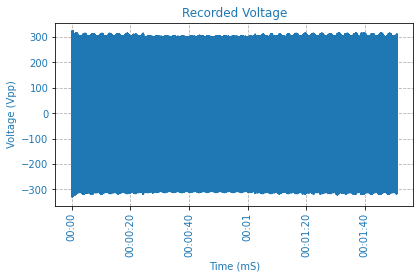

In [8]:
data.plot(kind='line', legend=None)
plt.xticks(color='C0', rotation='vertical')
plt.xlabel('Time (mS)', color='C0', size=10)
plt.yticks(color='C0')
plt.tight_layout(pad=2)
plt.title('Recorded Voltage', color='C0')
plt.ylabel('Voltage (Vpp)', color='C0', size=10)
plt.grid('on', linestyle='--')

plt.show()

In [9]:
data

,Voltage
Time,
00:00:00.001000,-182.4
00:00:00.002000,-102.6
00:00:00.003000,0.0
00:00:00.004000,95.0
00:00:00.005000,186.2
...,...
00:01:50.996000,163.4
00:01:50.997000,68.4
00:01:50.998000,-34.2
